# 전처리와 KNN (K-Nearest Neighbors)

지금까지는 깨끗한 데이터만 써왔는데, 실제로는 더러운 데이터가 대부분이다. 이제 진짜 전처리를 배워보자.

이 장에서 여러분은 실제 데이터의 문제점을 파악하고 해결하는 전처리 과정과 KNN 알고리즘을 배운다. 구체적인 내용은 다음 세 가지이다.

1. **전처리(Preprocessing)**: 결측치 처리와 데이터 정제
2. **KNN 모델 훈련과 사용, 평가**: 거리 기반 분류 알고리즘
3. **시각화**: PCA, tSNE 차원축소를 통한 분류 결과 시각화

## 1. 전처리 (Preprocessing)

실제 데이터는 대부분 더럽다. 결측치가 있고, 이상치가 있고, 형식이 맞지 않는다. 이런 문제를 해결하는 과정이 전처리다. 

전처리 과정은 다음과 같다:
1. 데이터 탐색으로 문제점 파악하기
2. 결측치 처리 전략 결정하기
3. 범주형 데이터를 숫자로 변환하기

### 1.1. 데이터 탐색과 문제점 파악

실제 데이터셋을 로드해서 어떤 문제가 있는지 살펴보자. 결측치가 어느 열에 얼마나 있는지 파악하는 것이 첫 번째 단계다.

In [6]:
import seaborn as sns

# 실제 더러운 데이터 로드
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
# 데이터 길이와 유효값 개수를 열별로 확인
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
# 열별 결측치 개수 확인
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
# 결측치가 있는 열 찾기 - 뭘 반환하는지 살펴보기
titanic.isna().sum() > 0

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [13]:
# 결측치가 있는 열만 추출
titanic.isna().sum()[titanic.isna().sum() > 0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

In [53]:
# deck 날려
titanic = sns.load_dataset('titanic')
clean_titanic = titanic.drop(columns=['deck', 'embarked'])

# age 평균으로 채워
age_mean = clean_titanic['age'].mean()
clean_titanic['age'] = clean_titanic['age'].fillna(age_mean)

# embark_town 최빈값으로 채워
em_mod = clean_titanic['embark_town'].mode()[0]
clean_titanic['embark_town'].fillna(em_mod, inplace=True)

clean_titanic.isna().sum()[clean_titanic.isna().sum() > 0]

C:\Users\catac\AppData\Local\Temp\ipykernel_8704\753356215.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_titanic['embark_town'].fillna(em_mod, inplace=True)


Series([], dtype: int64)

In [ ]:
clean_titanic.to_csv('clean_titanic.csv')

#### Practice1. 다른 데이터셋도 탐색해보기

1. `titanic` 데이터셋의 결측치가 어느 열에 얼마나 있는지 확인하기 (복습)
2. `penguins` 데이터셋을 로드해서 결측치가 있는 열과 개수를 확인하기

In [7]:
# penguins 데이터셋 탐색
penguins = sns.load_dataset('penguins')
penguins.isna().sum()[penguins.isna().sum() > 0]

bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

### 1.2. 결측치 처리 전략

앞서 본 titanic 데이터셋에서 결측치가 나오는 열을 기준으로 적당한 처리 전략을 결정해보자. 열을 드롭해버리거나, 평균값이나 최빈값으로 채우는 방법이 있다.

In [8]:
titanic = sns.load_dataset('titanic')

In [11]:
mean_age = titanic['age'].mean()
titanic['age'] = titanic['age'].fillna(mean_age)

In [12]:
titanic['embarked'].tail(), titanic['embark_town'].tail()

(886    S
 887    S
 888    S
 889    C
 890    Q
 Name: embarked, dtype: object,
 886    Southampton
 887    Southampton
 888    Southampton
 889      Cherbourg
 890     Queenstown
 Name: embark_town, dtype: object)

In [13]:
titanic.drop(columns=['embarked'], inplace=True)

In [15]:
freq = titanic['embark_town'].mode()[0]
titanic['embark_town'] = titanic['embark_town'].fillna(freq)

In [16]:
titanic.drop(columns=['deck'], inplace=True)

In [17]:
clean_titanic = titanic.copy()
clean_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   class        891 non-null    category
 8   who          891 non-null    object  
 9   adult_male   891 non-null    bool    
 10  embark_town  891 non-null    object  
 11  alive        891 non-null    object  
 12  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 72.5+ KB


#### Practice2. `penguins`에서도 결측치 처리하기

`penguins` 데이터셋에서 결측치를 적절한 전략으로 처리해보자.

In [ ]:
# penguins 결측치 처리
penguins = sns.load_dataset('penguins')
penguins.info()

penguins.dropna(inplace=True)

penguins.isna().sum()[penguins.isna().sum() > 0]

In [ ]:
clean_penguins = penguins.copy()
clean_penguins.to_csv('clean_penguins.csv')

### 1.3. 범주형 데이터 숫자 변환 (LabelEncoder 복습)

5차시에서 배운 LabelEncoder를 사용해서 범주형 데이터를 숫자로 변환하자. 머신러닝 모델은 숫자만 이해할 수 있기 때문이다.

In [54]:
from sklearn.preprocessing import LabelEncoder

target_cols = 'sex class who adult_male embark_town alive alone'.split()
encoders = {}

for col in target_cols:
    le = LabelEncoder()
    le.fit(clean_titanic[col])
    clean_titanic[col] = le.transform(clean_titanic[col])
    encoders[col] = le

clean_titanic

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.000000,1,0,7.2500,2,1,1,2,0,0
1,1,1,0,38.000000,1,0,71.2833,0,2,0,0,1,0
2,1,3,0,26.000000,0,0,7.9250,2,2,0,2,1,1
3,1,1,0,35.000000,1,0,53.1000,0,2,0,2,1,0
4,0,3,1,35.000000,0,0,8.0500,2,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,1,1,1,2,0,1
887,1,1,0,19.000000,0,0,30.0000,0,2,0,2,1,1
888,0,3,0,29.699118,1,2,23.4500,2,2,0,2,0,0
889,1,1,1,26.000000,0,0,30.0000,0,1,1,0,1,1


In [57]:
prep_titanic = clean_titanic.copy()
prep_titanic

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.000000,1,0,7.2500,2,1,1,2,0,0
1,1,1,0,38.000000,1,0,71.2833,0,2,0,0,1,0
2,1,3,0,26.000000,0,0,7.9250,2,2,0,2,1,1
3,1,1,0,35.000000,1,0,53.1000,0,2,0,2,1,0
4,0,3,1,35.000000,0,0,8.0500,2,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,1,1,1,2,0,1
887,1,1,0,19.000000,0,0,30.0000,0,2,0,2,1,1
888,0,3,0,29.699118,1,2,23.4500,2,2,0,2,0,0
889,1,1,1,26.000000,0,0,30.0000,0,1,1,0,1,1


#### Practice3. `preprocessed_titanic`, `preprocessed_penguins` 생성하기

전처리 완료된 깨끗한 데이터셋 두 개를 만들어서 나중에 KNN 실습에 사용하자.

In [ ]:
# 1. clean_titanic 생성 (이미 처리 완료)
clean_titanic = titanic.copy()
print("✅ clean_titanic 생성 완료")
print(f"   크기: {clean_titanic.shape}")
print(f"   결측치: {clean_titanic.isna().sum().sum()}개")
print()

# 2. clean_penguins 생성
clean_penguins = penguins_clean.copy()
# penguins의 문자열 컬럼들도 변환
penguin_text_cols = ['species', 'island', 'sex']
for col in penguin_text_cols:
    if col in clean_penguins.columns:
        le = LabelEncoder()
        clean_penguins[col] = le.fit_transform(clean_penguins[col])

print("✅ clean_penguins 생성 완료")
print(f"   크기: {clean_penguins.shape}")
print(f"   결측치: {clean_penguins.isna().sum().sum()}개")
print()

In [ ]:
# 전처리 완료된 데이터 미리보기
print("=== clean_titanic ===")
print(clean_titanic.head())
print()

print("=== clean_penguins ===")
print(clean_penguins.head())
print()


## 2. KNN 모델 훈련과 사용, 평가

이제 전처리가 완료된 깨끗한 데이터로 KNN(K-Nearest Neighbors) 알고리즘을 배워보자. KNN은 가장 직관적인 분류 알고리즘 중 하나다.

### 2.1. KNN 기본 개념과 원리

KNN은 "가장 가까운 이웃들의 투표로 분류하는 직관적인 방법"이다. 

**원리:**
- 새로운 데이터가 들어오면, 가장 가까운 K개의 이웃을 찾는다
- 그 K개 이웃들이 어떤 클래스인지 확인한다
- 다수결로 새로운 데이터의 클래스를 결정한다

**K값의 의미:**
- K=1: 가장 가까운 1개만 보고 결정 (과적합 위험)
- K=3: 가장 가까운 3개를 보고 다수결로 결정
- K=5: 가장 가까운 5개를 보고 다수결로 결정
- K가 클수록 안정적이지만, 너무 크면 경계가 뭉뚱그려짐
- **홀수 추천**: 동점을 피하기 위해

#### Practice1. K값 변화에 따른 영향 생각해보기

만약 당신이 새로운 동네로 이사를 왔다고 생각해보자:
- K=1: 바로 옆집 1명만 보고 이 동네 분위기를 판단
- K=5: 가장 가까운 5집을 보고 판단  
- K=50: 가장 가까운 50집을 보고 판단

어떤 K값이 가장 정확할까? 왜 그럴까?

### 2.2. KNN 모델 선언과 학습

이제 실제로 KNN 모델을 만들어보자. 원본 고차원 데이터로 모델을 학습시키는 것이 중요하다.

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

xs = prep_titanic.iloc[:, 1:]
ys = prep_titanic.iloc[:, 0]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(xs, ys)
len(x_train), len(x_test)

# KNN 모델 선언
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)



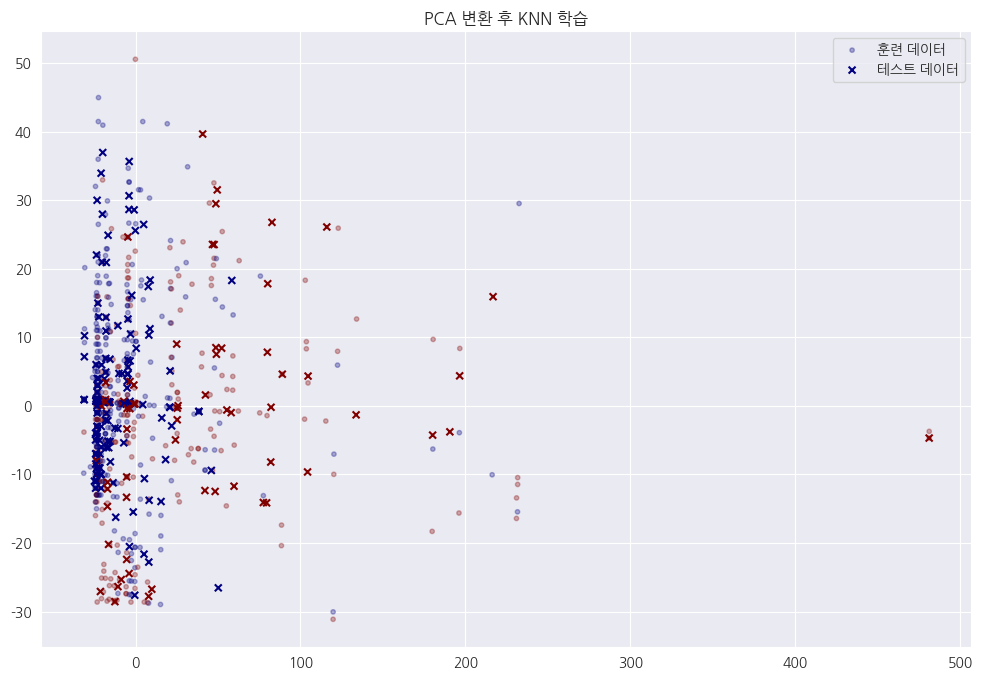

정확도 0.7174887892376681


In [86]:
# 차원 낮춤 - PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# y값은 색상
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.figure(figsize=(12, 8))
plt.title('PCA 변환 후 KNN 학습')

plt.scatter(
    x_train_pca[:, 0], x_train_pca[:, 1],
    c=y_train, label='훈련 데이터', alpha=.3, s=10, cmap='jet'
)

plt.scatter(
    x_test_pca[:, 0], x_test_pca[:, 1],
    c=y_pred, label='테스트 데이터', s=25, marker='x', cmap='jet'
)

plt.legend()
plt.show()

# 정확도(성능평가)
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print("정확도", acc)

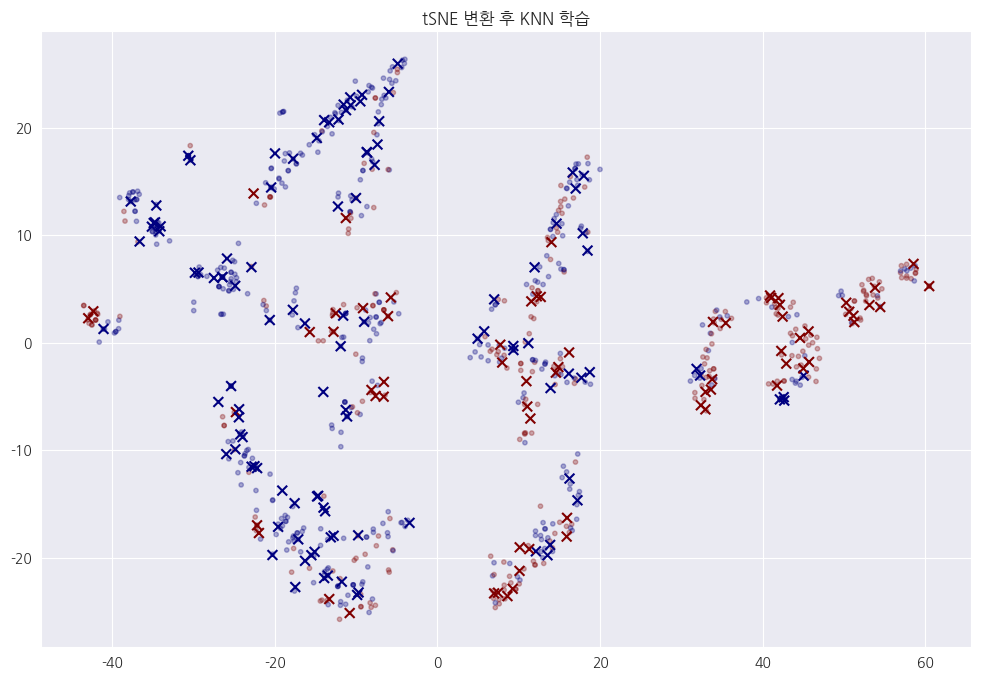

In [90]:
x = clean_titanic.iloc[:, 1:]
y = clean_titanic.iloc[:, 0]

# tSNE 변환
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(tsne_results, y, test_size=.2)

knn_tsne = KNeighborsClassifier(n_neighbors=5)
knn_tsne.fit(x_train, y_train)
y_pred = knn_tsne.predict(x_test)

# 시각화
plt.figure(figsize=(12, 8))
plt.title('tSNE 변환 후 KNN 학습')
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train,
            label='훈련 데이터', s=10, alpha=.3, cmap='jet')

plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred,
            label='테스트 데이터', s=50, marker='x', cmap='jet')

In [92]:
accuracy_score(y_test, y_pred)

0.7374301675977654

#### Practice2. K값을 바꿔가며 성능 비교하기

K=1, K=3, K=7, K=15로 바꿔가며 어떤 K값이 가장 좋은 성능을 보이는지 확인해보자.

In [96]:
from sklearn.metrics import accuracy_score

# 여러 K값으로 성능 비교
k_values = list(range(3, 15, 2))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred_k = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred_k)
    accuracies.append(accuracy)
    print(f"K={k}: 정확도 {accuracy:.3f}")

accuracies

K=3: 정확도 0.803
K=5: 정확도 0.776
K=7: 정확도 0.753
K=9: 정확도 0.717
K=11: 정확도 0.731
K=13: 정확도 0.726


[0.8026905829596412,
 0.7757847533632287,
 0.7533632286995515,
 0.7174887892376681,
 0.7309417040358744,
 0.726457399103139]

### 2.3. KNN 모델 평가 (복습)

ML 4차시에서 배운 평가 방법들을 복습해보자. 코드와 결과만 간단히 확인하면 된다.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 최고 성능 K값으로 최종 모델 생성
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)
final_pred = final_model.predict(X_test)

# 1. accuracy_score
accuracy = accuracy_score(y_test, final_pred)
print(f"정확도: {accuracy:.3f}")
print()

# 2. classification_report
print("분류 리포트:")
print(classification_report(y_test, final_pred))
print()

# 3. confusion_matrix
print("혼동 행렬:")
print(confusion_matrix(y_test, final_pred))

#### Practice3. clean_penguins, clean_diamonds로도 KNN 실습하기

다른 데이터셋으로도 KNN을 실습해보자.
- penguins: 종(species) 분류


In [97]:
# penguins 로드
penguins = sns.load_dataset('penguins')

# penguins 전처리


# 1. clean_penguins로 종 분류
X_penguin = clean_penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y_penguin = clean_penguins['species']

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_penguin, y_penguin, test_size=0.2, random_state=42)

knn_penguin = KNeighborsClassifier(n_neighbors=5)
knn_penguin.fit(X_train_p, y_train_p)
y_pred_p = knn_penguin.predict(X_test_p)

print("🐧 Penguins 종 분류 결과:")
print(f"정확도: {accuracy_score(y_test_p, y_pred_p):.3f}")
print()

NameError: name 'clean_penguins' is not defined

## 3. 시각화

제일 중요하다. 그래프를 그릴 줄 알아야 한다. 이번에는 KNN 분류 결과를 시각화해보자.

### 3.1. KNN 결과 시각화

PCA 차원축소는 시각화 목적으로만 사용한다. 모델 학습은 원본 데이터로, 시각화만 2차원으로 축소해서 보여준다.

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
from sklearn.decomposition import PCA

# PCA로 2차원 축소 (시각화 목적으로만)
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# 분류 결과 시각화
plt.figure(figsize=(12, 5))

# 왼쪽: 실제값
plt.subplot(1, 2, 1)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', alpha=0.7)
plt.title('실제 생존 여부')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} 설명)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} 설명)')
plt.colorbar(label='생존(1) vs 사망(0)')

# 오른쪽: 예측값
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=final_pred, cmap='viridis', alpha=0.7)
plt.title(f'KNN 예측 결과 (K={best_k})')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} 설명)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} 설명)')
plt.colorbar(label='생존(1) vs 사망(0)')

plt.tight_layout()
plt.show()

In [ ]:
# K값에 따른 정확도 변화 그래프
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, 'bo-', linewidth=2, markersize=8)
plt.title('K값에 따른 KNN 성능 변화')
plt.xlabel('K값')
plt.ylabel('정확도')
plt.grid(True, alpha=0.3)

# 최고 성능 K값 표시
plt.axvline(best_k, color='red', linestyle='--', alpha=0.7, label=f'최고 성능 K={best_k}')
plt.legend()

# 각 점에 정확도 값 표시
for k, acc in zip(k_values, accuracies):
    plt.annotate(f'{acc:.3f}', (k, acc), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

In [ ]:
# 혼동행렬 히트맵 시각화
import seaborn as sns

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, final_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['사망', '생존'], yticklabels=['사망', '생존'])
plt.title(f'혼동행렬 (K={best_k})')
plt.xlabel('예측값')
plt.ylabel('실제값')
plt.show()

print(f"정확도: {accuracy:.3f}")
print(f"총 {len(y_test)}명 중 {(final_pred == y_test).sum()}명 정확히 예측")

#### Practice4. 세 데이터셋 모두 시각화하기

penguins와 diamonds 데이터도 PCA로 차원축소해서 분류 결과를 시각화해보자.

In [ ]:
# 세 데이터셋 모두 시각화
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Titanic 시각화
pca_titanic = PCA(n_components=2)
X_test_titanic_pca = pca_titanic.fit_transform(X_test)

axes[0, 0].scatter(X_test_titanic_pca[:, 0], X_test_titanic_pca[:, 1], c=y_test, cmap='viridis', alpha=0.7)
axes[0, 0].set_title('Titanic 실제값')
axes[1, 0].scatter(X_test_titanic_pca[:, 0], X_test_titanic_pca[:, 1], c=final_pred, cmap='viridis', alpha=0.7)
axes[1, 0].set_title(f'Titanic 예측값 (정확도: {accuracy:.3f})')

# 2. Penguins 시각화
pca_penguin = PCA(n_components=2)
X_test_penguin_pca = pca_penguin.fit_transform(X_test_p)

axes[0, 1].scatter(X_test_penguin_pca[:, 0], X_test_penguin_pca[:, 1], c=y_test_p, cmap='viridis', alpha=0.7)
axes[0, 1].set_title('Penguins 실제값')
axes[1, 1].scatter(X_test_penguin_pca[:, 0], X_test_penguin_pca[:, 1], c=y_pred_p, cmap='viridis', alpha=0.7)
axes[1, 1].set_title(f'Penguins 예측값 (정확도: {accuracy_score(y_test_p, y_pred_p):.3f})')

# 3. Diamonds 시각화
pca_diamond = PCA(n_components=2)
X_test_diamond_pca = pca_diamond.fit_transform(X_test_d)

axes[0, 2].scatter(X_test_diamond_pca[:, 0], X_test_diamond_pca[:, 1], c=y_test_d, cmap='viridis', alpha=0.7)
axes[0, 2].set_title('Diamonds 실제값')
axes[1, 2].scatter(X_test_diamond_pca[:, 0], X_test_diamond_pca[:, 1], c=y_pred_d, cmap='viridis', alpha=0.7)
axes[1, 2].set_title(f'Diamonds 예측값 (정확도: {accuracy_score(y_test_d, y_pred_d):.3f})')

plt.tight_layout()
plt.show()

print("🎉 ML 6. 전처리와 KNN 완료!")
print("배운 내용:")
print("1. 실제 데이터의 결측치 탐색과 처리")
print("2. LabelEncoder로 문자열을 숫자로 변환")
print("3. KNN 알고리즘으로 분류 수행")
print("4. PCA 차원축소를 통한 시각화")